In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

sys.path.insert(1, '../../data/')
from datasets import tanh_v1
sys.path.insert(1, '../../methods/')
from TriangularEstimators import ScaledCostOT

np.random.seed(10)

## Define dataset

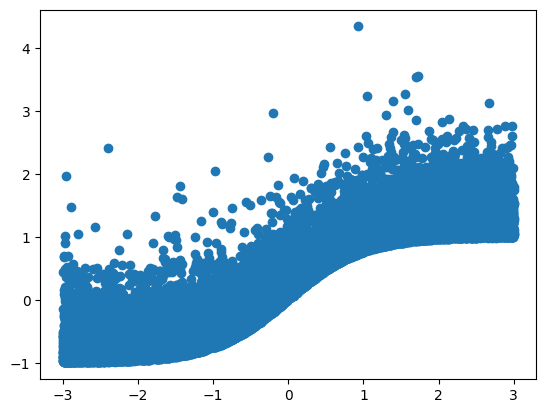

In [3]:
# define number of samples
N = 20000

# define class
pi = tanh_v1()

# define source samples
X = pi.sample_joint(N)
X_source = np.hstack((X[:,0][:,None], np.random.randn(N,1)))

# define target samples
X_target = pi.sample_joint(N)

plt.scatter(X_target[:,0],X_target[:,1])
plt.show()

## Fit the various models to the data

In [4]:
dim_x = dim_y = 1
beta = 1e-3 

In [11]:
# ICNN model
n_iters_icnn = 1000 ### number of training iterations
ot_icnn = ScaledCostOT(dx1=dim_x,dx2=dim_y,beta=beta,estimator='ICNN', n_iters=n_iters_icnn) ## move this as a **args
ot_icnn.fit(source=X_source, target=X_target)
print('Done ICNN')

# Nearest-Neighbor estimator
ot_nn = ScaledCostOT(dx1=dim_x,dx2=dim_y,beta=beta,estimator='NN')
ot_nn.fit(source=X_source, target=X_target)
print('Done NN')

# Entropic map estimator
eps_ott = beta/3
n_inters_ott = 2000
ot_ott = ScaledCostOT(dx1=dim_x,dx2=dim_y,beta=beta,estimator='OTT',eps=eps_ott,debias=False)
ot_ott.fit(source=X_source, target=X_target, max_iter=n_inters_ott)
print('Done OTT')

Done OTT


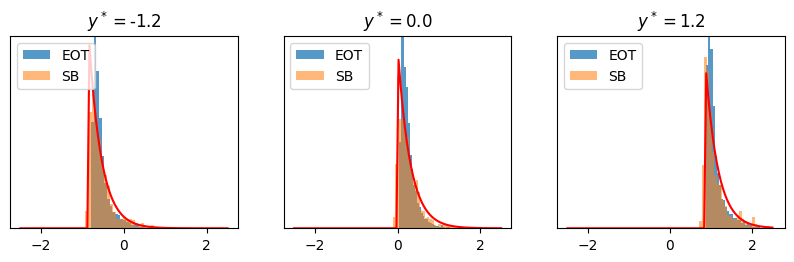

In [12]:
Ntest = int(5000)
y_locs = [-1.2,0.,1.2]
nbins = 30

# Share a Y axis with each row of subplots
fig, ax = plt.subplots(1, 3, figsize = (10,2.5))

for i,y in enumerate(y_locs):

    data_cond_y = np.hstack((np.ones((Ntest,1))*y, np.random.randn(Ntest,1)))
    # evaluate conditional density
    xx = np.linspace(-2.5,2.5,100)#[:,None]
    conditional_pdf = pi.conditional_pdf(y, xx)
    plt.subplot(1,3,i+1)
    plt.plot(xx, conditional_pdf, '-r')
    
    YX_transp_icnn = ot_icnn.evaluate(data_cond_y)
    ax.flatten()[i].hist(YX_transp_icnn[:,1], bins=nbins, density=True, label='MLP',alpha=.75)
    
    YX_transp_nn = ot_nn.evaluate(data_cond_y)
    ax.flatten()[i].hist(YX_transp_nn[:,1], bins=nbins, density=True, label='NN',alpha=.55)
    
    YX_transp_ott = ot_ott.evaluate(data_cond_y)
    ax.flatten()[i].hist(YX_transp_ott[:,1], bins=nbins, density=True, label='EOT',alpha=.75)
    
    ax.flatten()[i].legend(loc='upper left')
    ax.flatten()[i].set_title(r'$y^* = $'+str(y))
    ax.flatten()[i].set_ylim(0, 3.5)
    ax.flatten()[i].tick_params(left = False, right = False , labelleft = False) #labelbottom = False, bottom = False) 
